# ANN 05: Fashion-MNIST 분류 프로젝트

이번 챕터에서는 지금까지 배운 ANN 지식을 활용해  
Fashion-MNIST 의류 이미지 분류기를 만들어봅니다.

📌 목표:
- 최적화된 ANN 모델 설계
- 학습 & 성능 평가
- 예측 결과 시각화


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 한글 폰트 설정
if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("✅ 데이터 준비 완료:", x_train.shape, y_train.shape)


2025-09-01 19:30:34.346539: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-01 19:30:34.455415: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-01 19:30:37.159393: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


✅ 데이터 준비 완료: (60000, 28, 28) (60000,)


## 🧠 모델 설계
- Flatten → Dense(256, relu)  
- Dropout(0.3)  
- Dense(128, relu)  
- Dropout(0.3)  
- Dense(10, softmax)  


In [2]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/home/ccd/dl/v_dl/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-09-01 19:30:39.029877: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.1,
                    batch_size=32,
                    verbose=1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7881 - loss: 0.5885 - val_accuracy: 0.8487 - val_loss: 0.4007
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8404 - loss: 0.4387 - val_accuracy: 0.8600 - val_loss: 0.3828
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8542 - loss: 0.4027 - val_accuracy: 0.8647 - val_loss: 0.3554
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8608 - loss: 0.3808 - val_accuracy: 0.8712 - val_loss: 0.3470
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8666 - loss: 0.3668 - val_accuracy: 0.8682 - val_loss: 0.3341
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8705 - loss: 0.3536 - val_accuracy: 0.8718 - val_loss: 0.3579
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8748 - loss: 0.3426 - val_accuracy: 0.8780 - val_loss: 0.3311
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8773 - loss: 0.3334 - 

In [4]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ 테스트 정확도: {test_acc:.4f}")


✅ 테스트 정확도: 0.8781


## 👀 예측 결과 시각화


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


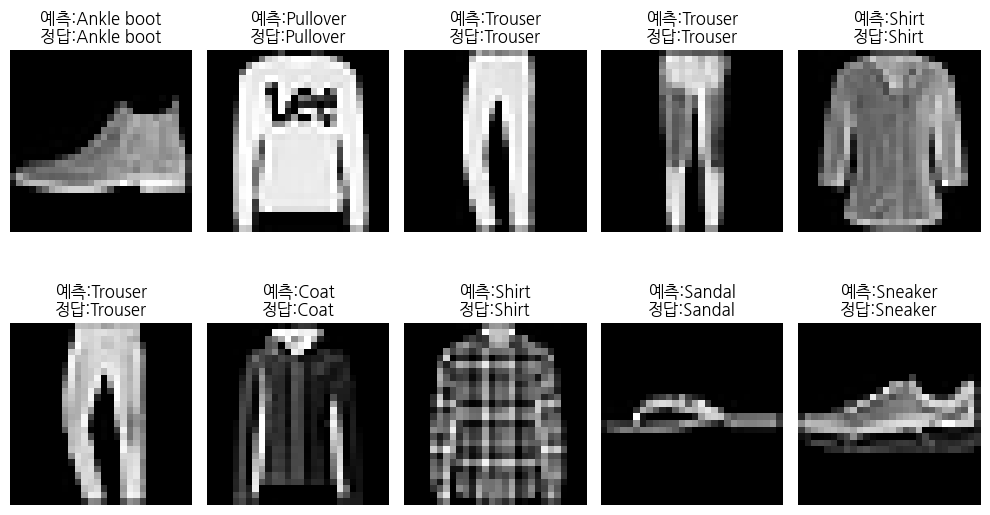

In [5]:
predictions = model.predict(x_test)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap="gray")
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"예측:{class_names[pred_label]}\n정답:{class_names[true_label]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


## ✅ 정리
- ANN으로 Fashion-MNIST 전체 분류 프로젝트 수행
- Dropout을 포함한 모델로 안정적인 성능 확보
- 예측 결과를 시각화하여 모델이 잘 분류하는지 확인

👉 다음 챕터: **성능 분석 (학습 곡선, 혼동 행렬 등)**
